In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Heart_Disease')

In [ ]:
df.head()

In [32]:
print(df.corr()['target'].abs().sort_values(ascending=False))

target                 1.000000
exer_angina            0.436757
chest_pain             0.433798
old_peak               0.430696
thalach                0.421741
ca                     0.391724
slope                  0.345877
thalassemia            0.344029
gender                 0.280937
age                    0.225439
rest_bps               0.144931
rest_ecg               0.137230
cholestrol             0.085239
fasting_blood_sugar    0.028046
Name: target, dtype: float64


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [7]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

## Created list of numerical variables

In [8]:
num_cols=list(df.columns[0:len(df.columns)-1])
num_cols.remove('gender')

In [9]:
num_cols

['age',
 'chest_pain',
 'rest_bps',
 'cholestrol',
 'fasting_blood_sugar',
 'rest_ecg',
 'thalach',
 'exer_angina',
 'old_peak',
 'slope',
 'ca',
 'thalassemia']

# EDA

In [10]:
# Plot numerical variables

In [35]:
plt.figure(figsize=(30,15))
for i in enumerate(num_cols):
    plt.countplot(3,4,i[0]+1)
    ax = sns.countplot(df[i[1]])
    ax.set_xlabel(i[1],fontsize=20)

plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'countplot'

<Figure size 3000x1500 with 0 Axes>

## check for unique values in every variable

In [12]:
df.nunique(axis=0)

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

## plot distribution of numerical variables divided by targets

Text(0.5, 1.0, 'Density Plot of cholestrol by target')

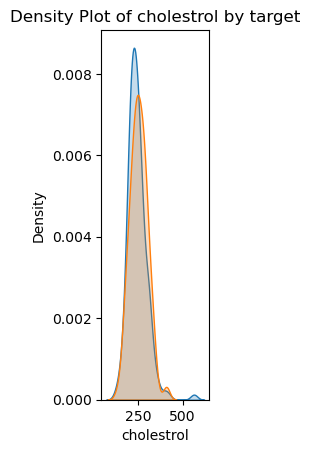

In [13]:
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in df["target"].unique():
    # extract the data
    x = df[df["target"] == i]["cholestrol"]
    # plot the data using seaborn
    plt.subplot(1,4,1)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of cholestrol by target")

Text(0.5, 1.0, 'Density Plot of restbps by target')

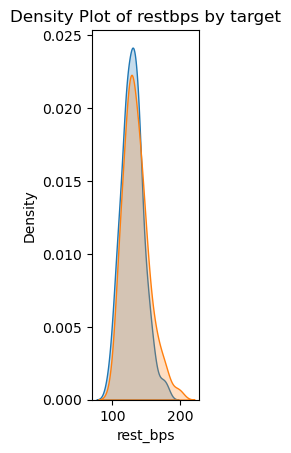

In [14]:
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in df["target"].unique():
    # extract the data
    x = df[df["target"] == i]["rest_bps"]
    # plot the data using seaborn
    plt.subplot(1,4,2)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of restbps by target")

Text(0.5, 1.0, 'Density Plot of thalach by target')

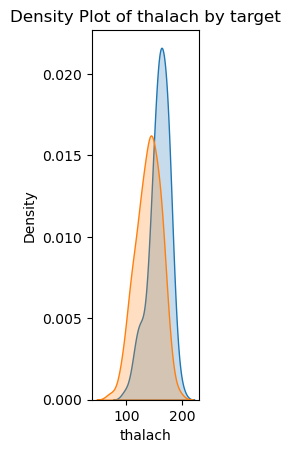

In [15]:
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in df["target"].unique():
    # extract the data
    x = df[df["target"] == i]["thalach"]
    # plot the data using seaborn
    plt.subplot(1,4,3)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of thalach by target")

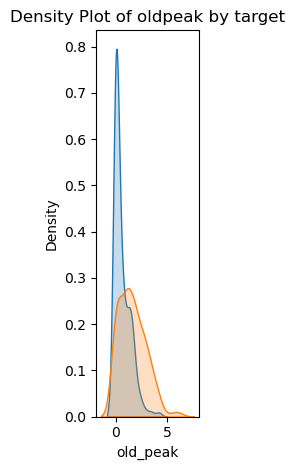

In [16]:
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for i in df["target"].unique():
    # extract the data
    x = df[df["target"] == i]["old_peak"]
    # plot the data using seaborn
    plt.subplot(1,4,4)
    sns.kdeplot(x, shade=True, label = "{} target".format(i))

# set the title of the plot
plt.title("Density Plot of oldpeak by target")

plt.tight_layout()
plt.show()

## Plot the data based on different target to show the ditribution of cholestrol and rest_bps as per different gender

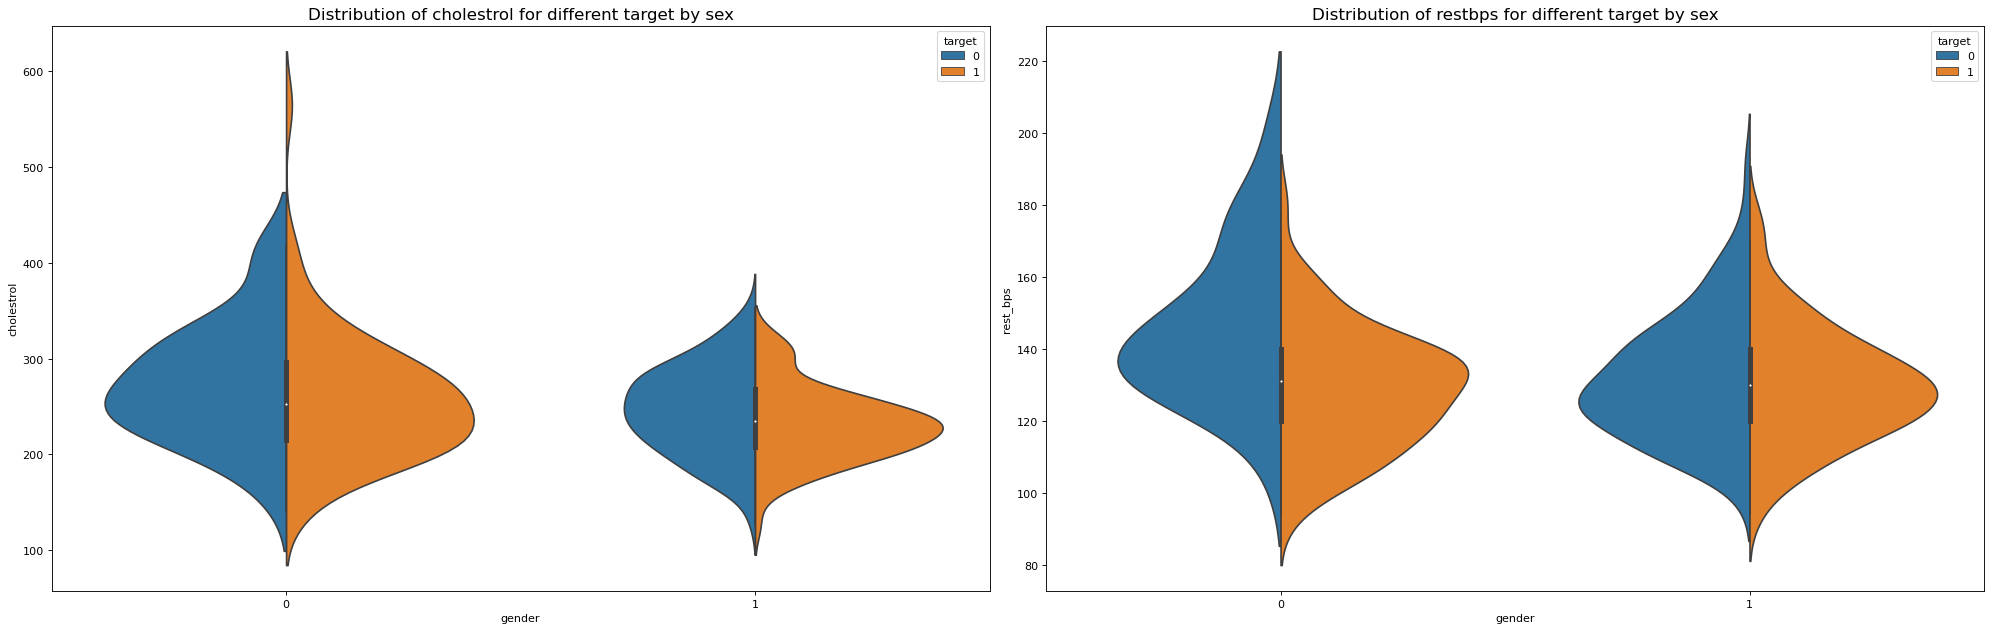

In [17]:
plt.figure(figsize=(25,8),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "gender", y = "cholestrol", hue = "target", split = True, data = df)
ax.set_title('Distribution of cholestrol for different target by sex', fontsize = 15)

plt.subplot(1,2,2)
ay = sns.violinplot(x = "gender", y = "rest_bps", hue = "target", split = True, data = df)
ay.set_title('Distribution of restbps for different target by sex', fontsize = 15)

plt.tight_layout()
plt.show()

## Plot the data based on different target to show the ditribution of thalach and oldpeak as per different gender

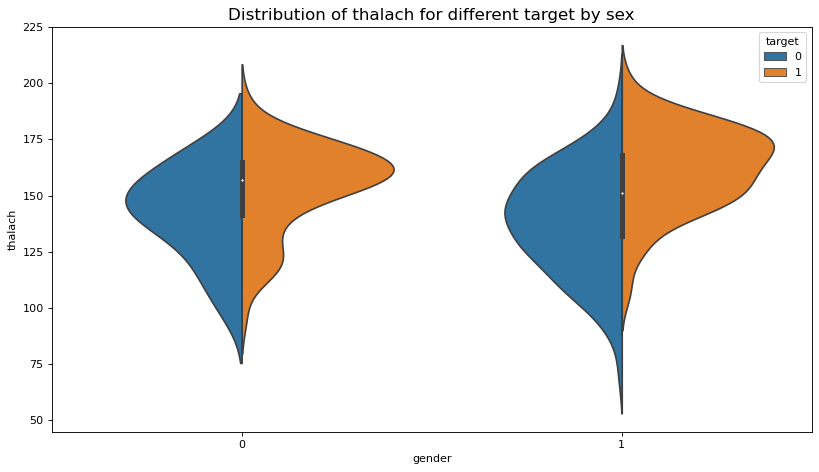

In [18]:
plt.figure(figsize=(20,6),dpi=80)
plt.subplot(1,2,1)
ax = sns.violinplot(x = "gender", y = "thalach", hue = "target", split = True, data = df)
ax.set_title('Distribution of thalach for different target by sex', fontsize = 15)

plt.tight_layout()
plt.show()

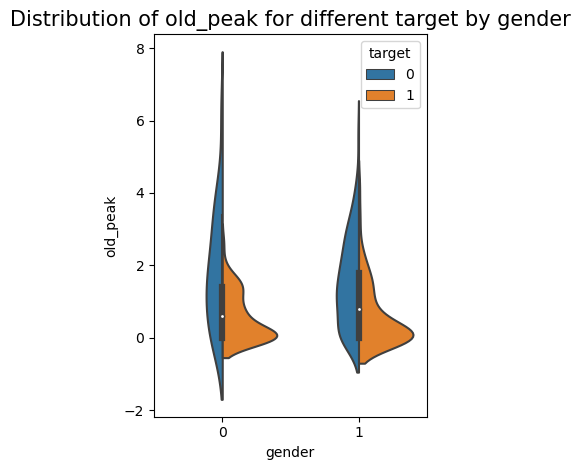

In [19]:
plt.subplot(1,2,2)
ay = sns.violinplot(x = "gender", y = "old_peak", hue = "target", split = True, data = df)
ay.set_title('Distribution of old_peak for different target by gender', fontsize = 15)

plt.tight_layout()
plt.show()

# Created list of categorical variables


In [20]:
cat_cols = ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']

# Created different dataframe for deceased and not deceased

In [21]:
heart_des = df[df['target']==1]
heart_notdes = df[df['target']==0]

# Plot distribution of every unique value of categorical columns for those who have deceased

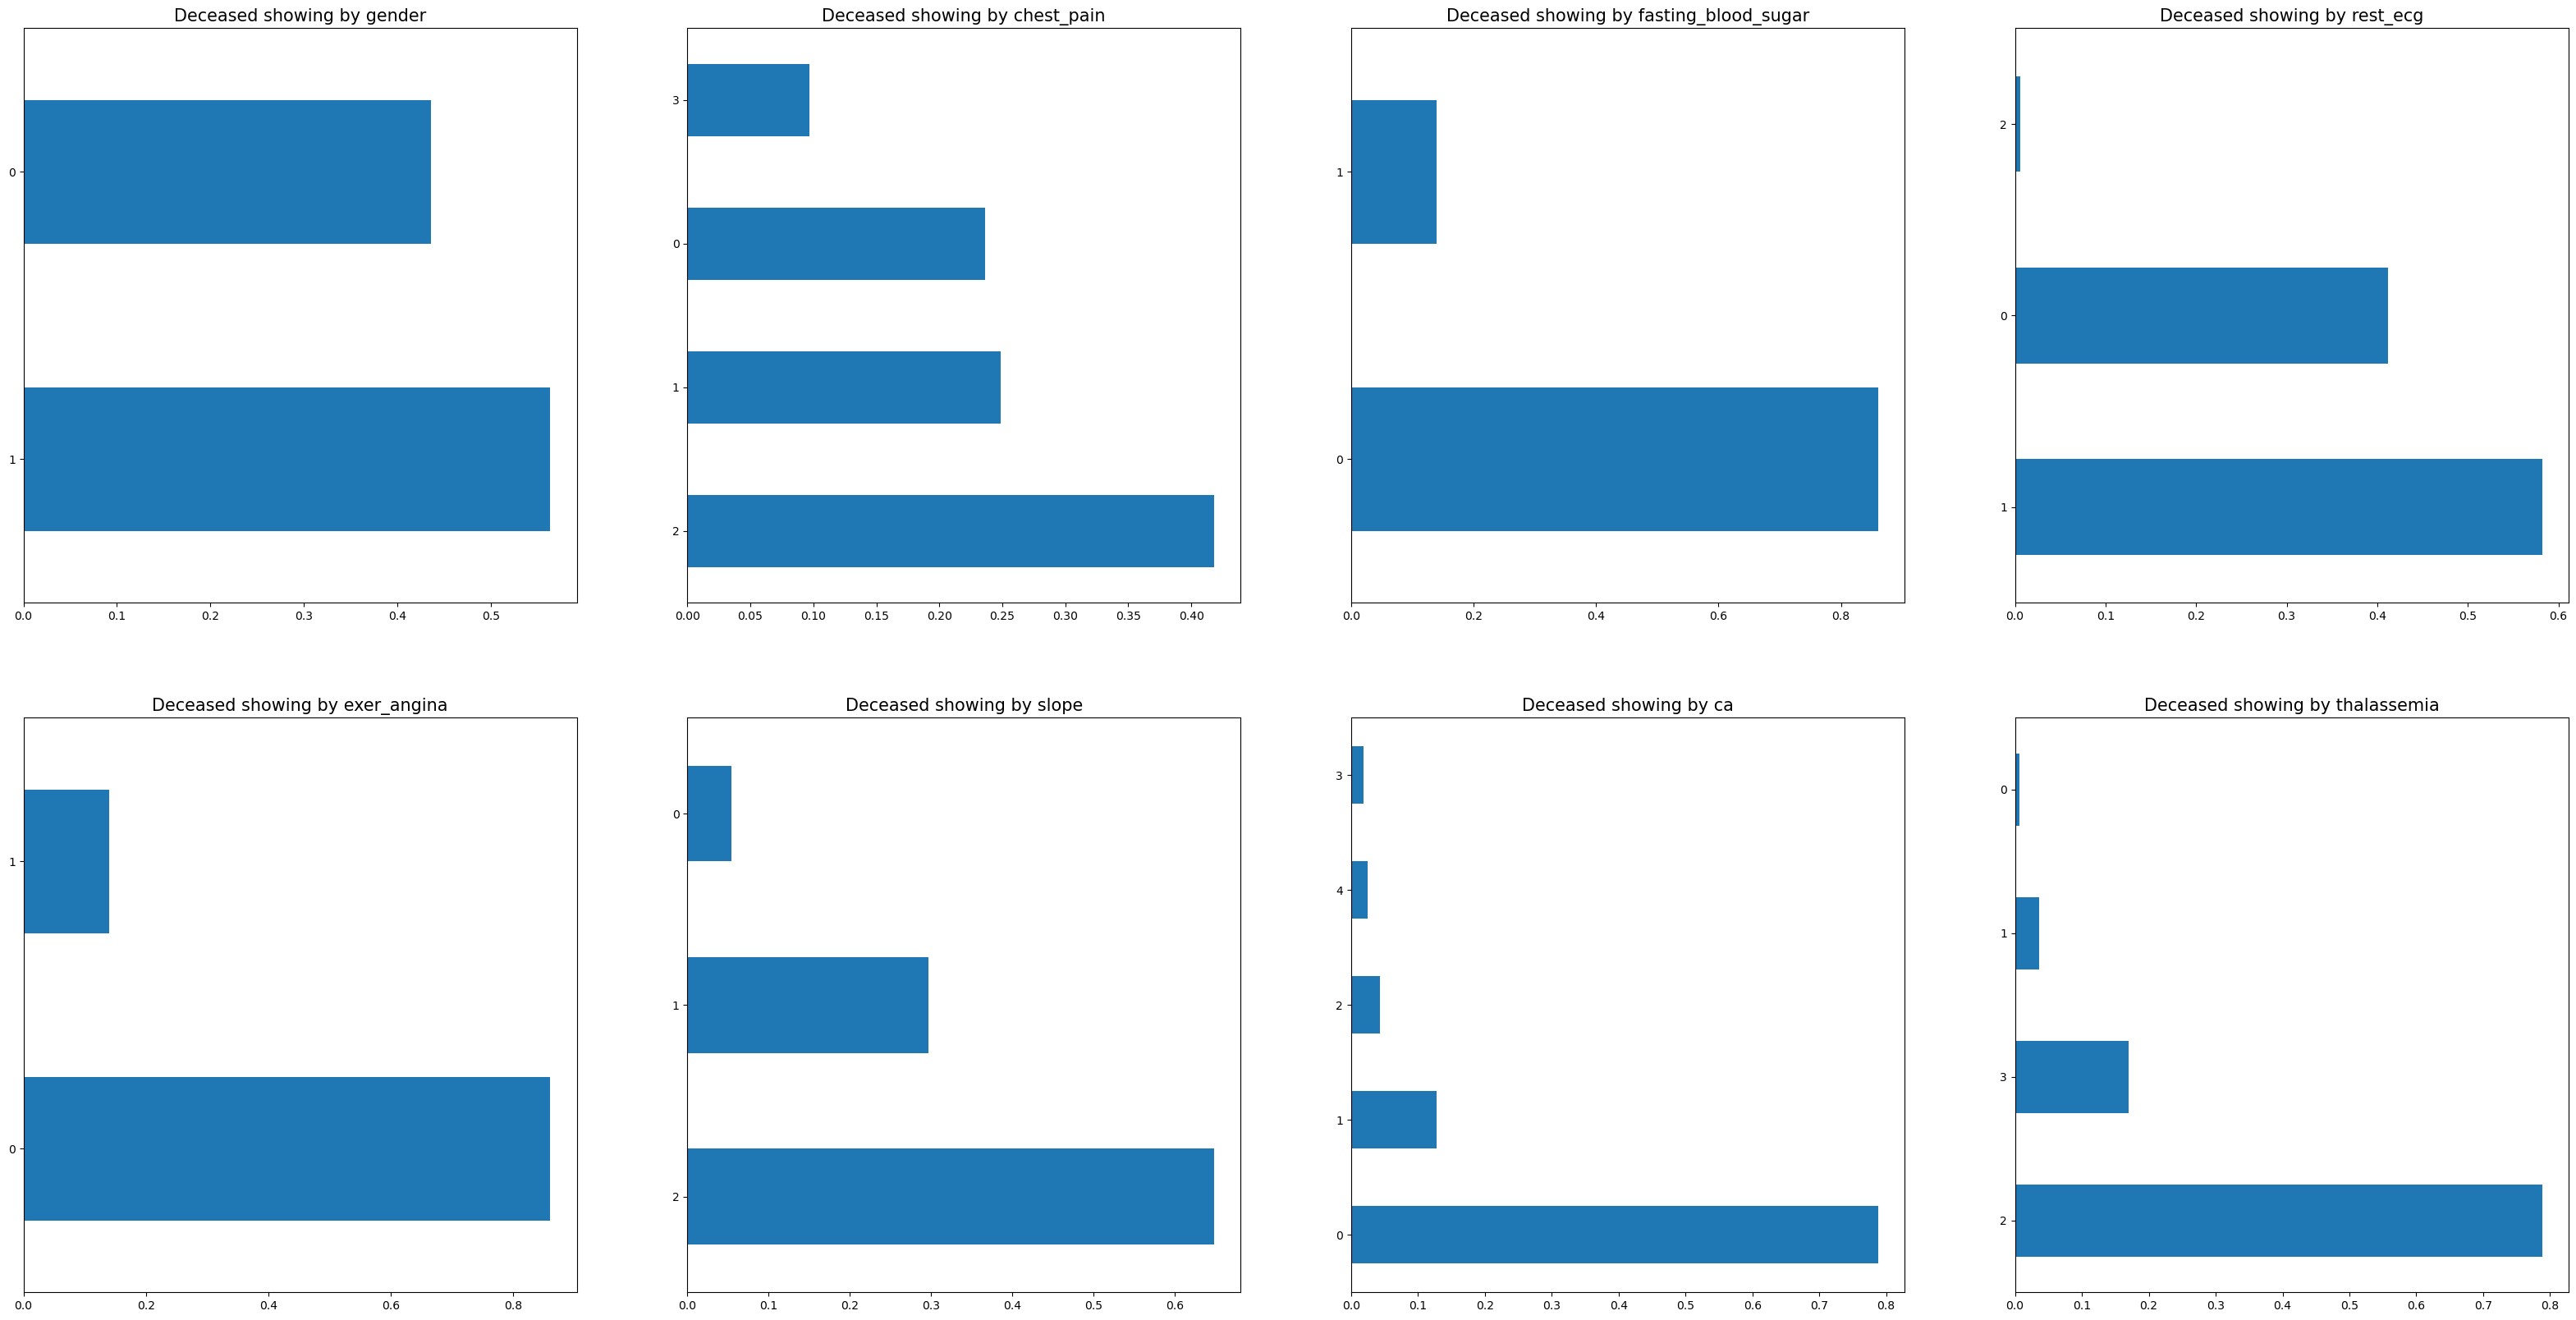

In [22]:
plt.figure(figsize=(40,20))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_des[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Deceased showing by "+i[1],fontsize=15)
plt.show()

# plot distribution of every unique value of categorical columns for those who have deceased.

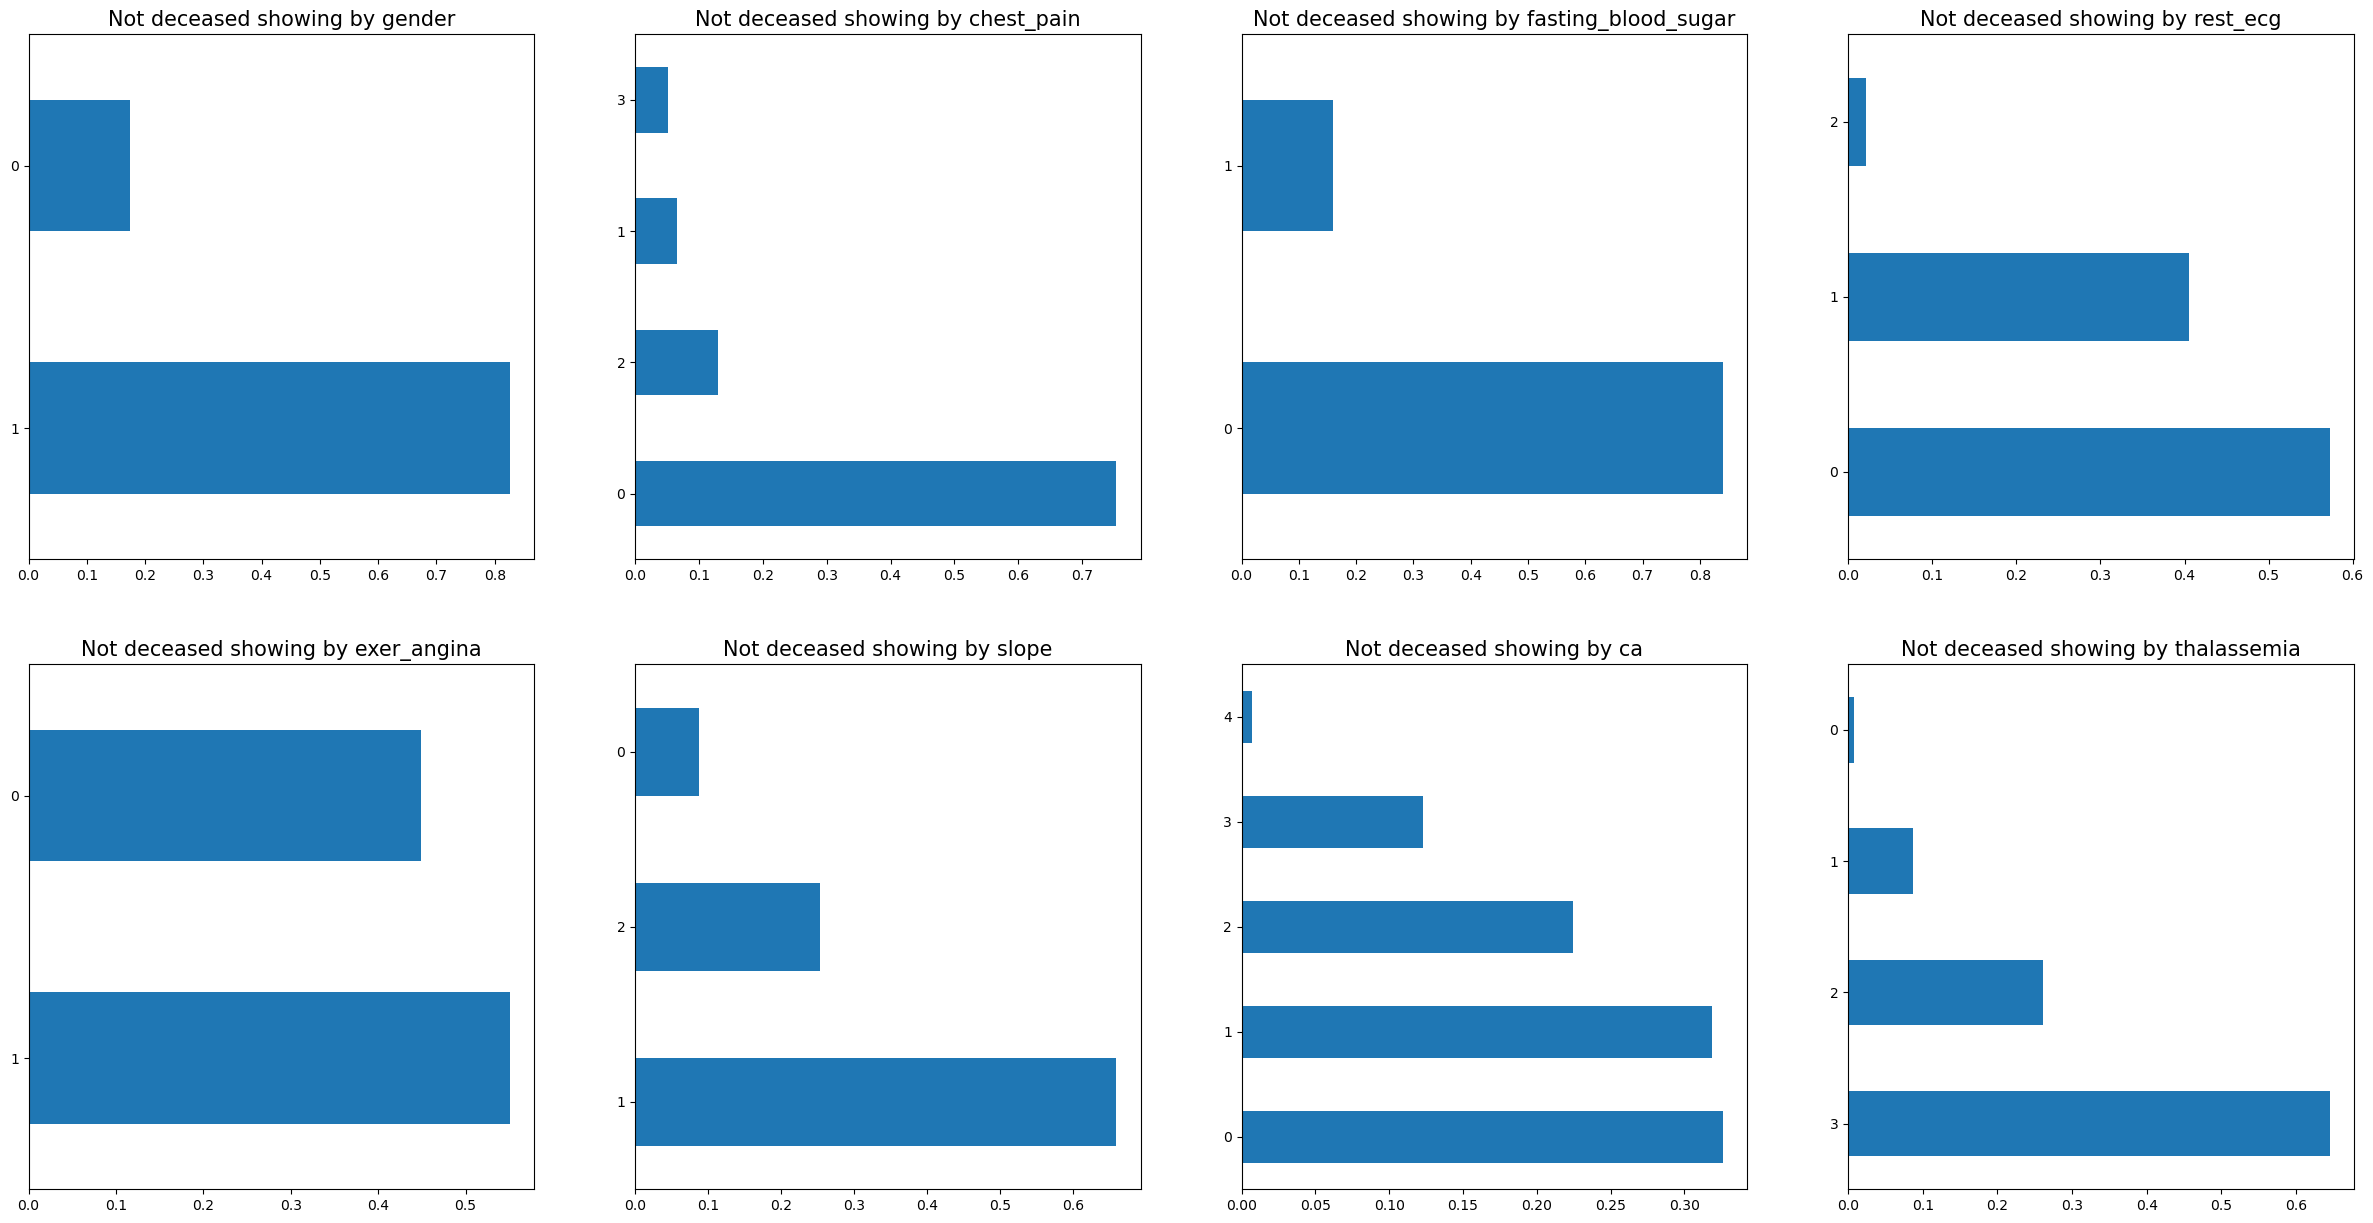

In [23]:
plt.figure(figsize=(30,15))
for i in enumerate(cat_cols):
    plt.subplot(2,4,i[0]+1)
    ax = heart_notdes[i[1]].value_counts(normalize=True).plot.barh()
    ax.set_title("Not deceased showing by "+i[1],fontsize=15)
plt.show()

# Model Building

# Divided train and test set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=50)

# divided x and y of train data

In [26]:
y_train = df_train.pop('target')
X_train = df_train

# divided x an y of test data

In [27]:
y_test = df_test.pop('target')
X_test = df_test

## create function for check train and test set


In [28]:
def check_model(dt):
    print("train confusion matrix : ",confusion_matrix(y_train,dt.predict(X_train)))
    print("train accuracy score : ",accuracy_score(y_train,dt.predict(X_train)))
    print("__"*50)
    print("test confusion matrix : ",confusion_matrix(y_test,dt.predict(X_test)))
    print("test accuracy score : ",accuracy_score(y_test,dt.predict(X_test)))    

In [29]:
dt_default = DecisionTreeClassifier(random_state=0)
dt_res = dt_default.fit(X_train,y_train)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## check our default model

In [31]:
check_model(dt_res)

NameError: name 'confusion_matrix' is not defined

In [ ]:
from sklearn import tree

## create function to visualize graph

In [ ]:
def tree_graph(dt):
    fig = plt.figure(figsize=(25,20))
    dt_plot = tree.plot_tree(dt,feature_names=X_train.columns,class_names=['Not Deceased','Deceased'],filled=True,fontsize=15)

## check graph of our default model

In [ ]:
tree_graph(dt_res)

## Hyper parameter Tuning using Grid Search

In [ ]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10],
          'min_samples_split':[5,10,25,50,75,100,150]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=dt_default,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=1)

In [ ]:
grid_search.fit(X_train,y_train)

## chossing the best estimator from our estimators

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_params_

In [ ]:
best_dt = grid_search.best_estimator_

# Final Model

In [ ]:
#check the best model with test data

In [ ]:
check_model(best_dt)

In [ ]:
# plotting of our best model

In [ ]:
tree_graph(best_dt)